In [21]:
library(gprofiler2)

In [1]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)

In [22]:
head(df,2)

,ABHD10_.3_111697439_T_G,ABHD12B_.14_51328222_C_T,ACKR2_.3_42817129_C_T,ADD2_.2_70894426_A_T,ADSL_.22_40757228_A_C,AIM1L_.1_26673825_C_T,AKAP7_.6_131691964_C_A,ALDH7A1_.5_126011412_G_A,ANKRD18B_.9_33524775_C_A,APIP_.11_34905987_T_C,...,YWHAE_.17_1246420_G_A,ZBBX_.3_167080934_T_G,ZC3HAV1_.7_138730361_T_C,ZFR2_.19_3840157_C_T,ZG16B_.16_2871121_T_C,ZNF423_.16_49599995_C_G,ZNF552_.19_58315273_G_A,ZNF738_.19_21474173_G_A,ZNF77_.19_2936535_G_A,ZP3_.7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.2235163,-0.03575032,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.1120253,-0.04172133,0.01126897,0.1057579,-0.03101814,0.0909417,0.3020245,-0.1583842,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.1921801,-0.01471768,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.3759854,0.08774666,0.02505916,-0.1950055,-0.22780547,0.0775938,0.3452492,-0.3472152,-0.15259400


In [3]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
# Phenotype
phenotype_file = paste0(input_files_dir,"phenotype.csv")

In [4]:
df0 = read.csv(phenotype_file, row.names=1)
newcols = gsub("\\.","-",colnames(df0))
# head(newcols)
colnames(df0) = newcols
df0[1:5,1:5]

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [5]:
df1 = df0[,rownames(df)]
ncol(df0)
ncol(df1)
df1[1:5,1:5]

[1] 9219

[1] 8352

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [6]:
rowsums = rowSums(df1)

In [7]:
# remove all 0 genes
zero_genes = names(rowsums[rowsums==0])
head(zero_genes)
length(zero_genes)

[1] "FAM138A"       "OR4F5"         "RP11.34P13.14" "OR4F29"       
[5] "RP5.857K21.2"  "OR4F16"

[1] 4476

In [8]:
non0_pseudocells = rowSums(df1>0)
head(non0_pseudocells)

MIR1302.10      FAM138A        OR4F5 RP11.34P13.7 RP11.34P13.8   AL627309.1 
          56            0            0          287           15          834

In [9]:
# remove genes in less 10% of pseudocells
low_genes = names(non0_pseudocells[non0_pseudocells<0.1*ncol(df1)])
head(low_genes)
length(low_genes)

[1] "MIR1302.10"   "FAM138A"      "OR4F5"        "RP11.34P13.7" "RP11.34P13.8"
[6] "AL627309.1"

[1] 19035

In [10]:
all_genes_df = df1

In [11]:
df1_new = df1[!(rownames(df1) %in% unique(c(zero_genes, low_genes))),]
nrow(df1_new)

[1] 13703

In [12]:
df1 = df1_new

In [13]:
genes = rownames(df1)
length(genes)
head(genes)

[1] 13703

[1] "AP006222.2"    "RP11.206L10.3" "RP11.206L10.9" "LINC00115"    
[5] "FAM41C"        "RP11.54O7.1"

In [14]:
colnames(df)[grep("SLC35E2", colnames(df))]

[1] "SLC35E2_.1_1660978_C_A"

In [15]:
eqtl = "SLC35E2_.1_1660978_C_A"

In [16]:
gene_list = c()
for (gene in genes){
    gene_list = c(gene_list, cor(as.numeric(df1[gene,]), df[,eqtl]))
}
names(gene_list) = genes
gene_list = gene_list[order(gene_list, decreasing=T)]

In [17]:
length(gene_list)

[1] 13703

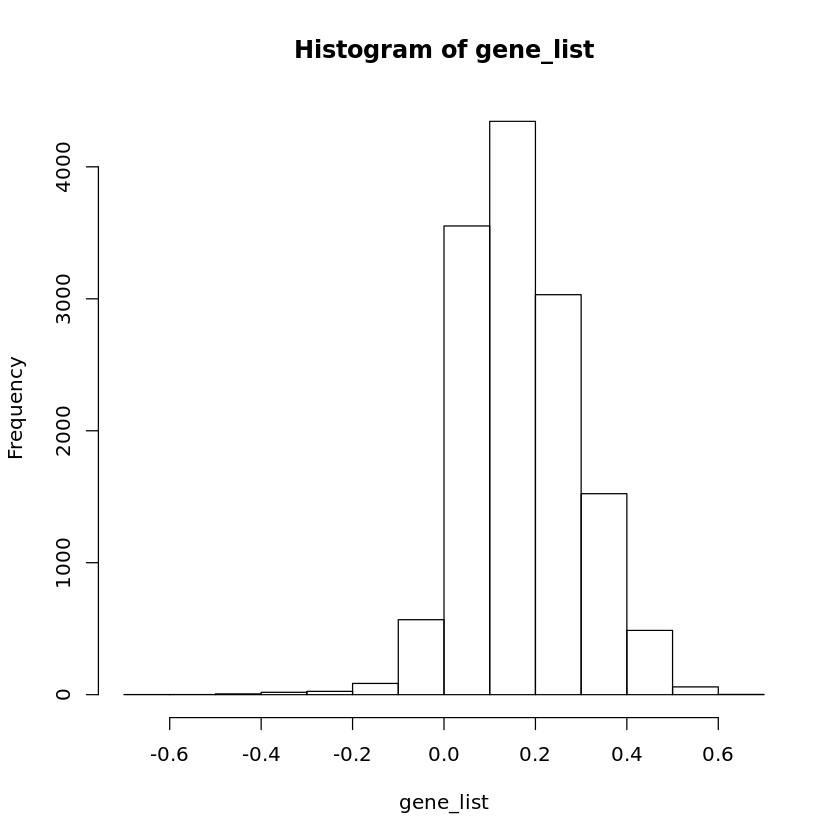

In [18]:
hist(gene_list)

In [24]:
genes_pos = gene_list[gene_list>0.4]
if (length(genes_pos)==0){next}
# order
genes_pos = genes_pos[order(genes_pos, decreasing = T)]
# get gene names only
genes = gsub(".*_","",names(genes_pos))
# run gprofiler
gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=TRUE)
gres$result

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
query_1,TRUE,6.902270e-11,2484,486,129,0.26543210,0.05193237,GO:0007399,GO:BP,nervous system development,18123,3289,GO:0048731
query_1,TRUE,1.436149e-10,747,362,50,0.13812155,0.06693440,GO:0099536,GO:BP,synaptic signaling,18123,22390,GO:0007267
query_1,TRUE,3.931150e-10,713,362,48,0.13259669,0.06732118,GO:0007268,GO:BP,chemical synaptic transmission,18123,3172,GO:0098916
query_1,TRUE,3.931150e-10,713,362,48,0.13259669,0.06732118,GO:0098916,GO:BP,anterograde trans-synaptic signaling,18123,22221,GO:0099537
query_1,TRUE,5.937664e-10,721,362,48,0.13259669,0.06657420,GO:0099537,GO:BP,trans-synaptic signaling,18123,22391,GO:0099536
query_1,TRUE,4.176148e-08,62,439,15,0.03416856,0.24193548,GO:0098930,GO:BP,axonal transport,18123,22231,GO:0008088
query_1,TRUE,4.428443e-08,73,439,16,0.03644647,0.21917808,GO:0008088,GO:BP,axo-dendritic transport,18123,3538,GO:0010970
query_1,TRUE,5.209740e-08,200,439,25,0.05694761,0.12500000,GO:0030705,GO:BP,cytoskeleton-dependent intracellular transport,18123,7973,GO:0046907
query_1,TRUE,4.749102e-07,223,334,22,0.06586826,0.09865471,GO:0006836,GO:BP,neurotransmitter transport,18123,2798,GO:0006810
query_1,TRUE,8.878985e-07,1159,486,69,0.14197531,0.05953408,GO:0048666,GO:BP,neuron development,18123,15012,"GO:0030182, GO:0048468"
